<a href="https://colab.research.google.com/github/vivekgautamgv/Python-For-Finance/blob/main/Seminar_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
<ipython-input-4-5238a274a6d4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
<ipython-input-4-5238a274a6d4>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Position'][i] == 1:
<ipython-input-4-5238a274a6d4>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

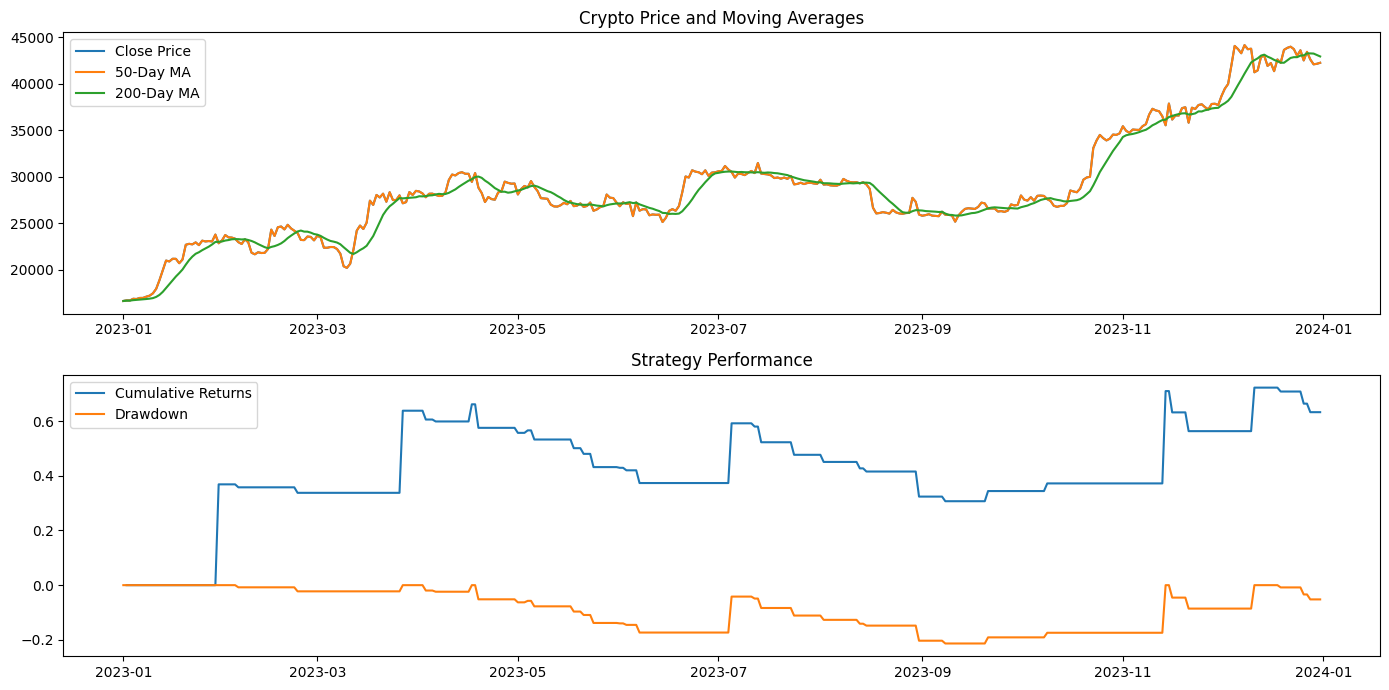

Total Invested amount :  10000
Final Return Percentage: 63.26%
Final Equity: $16325.82
Total Trades: 70
Max Drawdown: 21.33%


In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define parameters
symbol = 'BTC-USD'  # Crypto symbol
start_date = '2023-01-01'
end_date = '2024-01-01'
short_window = 1
long_window = 10

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Backtesting the strategy
initial_capital = 10000
shares = 0
capital = initial_capital
position = 0
equity = []
trade_count = 0  # To count the number of trades

for i in range(len(data)):
    if data['Position'][i] == 1: #This checks whether the trading signal for the current day (i) is a buy signal.
        # Buy
        #the short-term moving average has crossed above the long-term moving average,signaling a potential upward trend.
        shares = capital / data['Close'][i] #This calculates how many shares you can buy with your available capital By dividing the total capital by the closing price of the stock on day i
        position = shares * data['Close'][i] #This calculates the total value of your position (the money you’ve invested in the stock),By multiplying the number of shares you’ve bought by the closing price of the stock.
        capital = 0 #After buying the stock, you’ve spent all your money, so the remaining cash capital is set to zero.
        trade_count += 1  # Increment trade count on buy
    elif data['Position'][i] == -1: #This checks whether the trading signal for the current day (i) is a sell signal.
        # Sell
        capital = shares * data['Close'][i] #This calculates the total value of your position (the money you’ve invested in the stock),By multiplying the number of shares you’ve bought by the closing price of the stock.
        shares = 0 #After selling the stock, you’ve sold all your shares, so the number of shares is set to zero.
        position = 0
        trade_count += 1  # Increment trade count on sell
    equity.append(capital + position) #This updates the equity curve by recording the total value of the portfolio

data['Equity'] = equity

# Calculate returns and drawdown
data['Returns'] = data['Equity'].pct_change()
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Drawdown'] = data['Equity'] / data['Equity'].cummax() - 1

# Plot results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Short_MA'], label='50-Day MA')
plt.plot(data.index, data['Long_MA'], label='200-Day MA')
plt.title('Crypto Price and Moving Averages')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.plot(data.index, data['Drawdown'], label='Drawdown')
plt.title('Strategy Performance')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
final_return_percentage = data['Cumulative_Returns'].iloc[-1] * 100
final_equity = data['Equity'].iloc[-1]
max_drawdown = data['Drawdown'].min()

print("Total Invested amount : ",initial_capital)
print(f"Final Return Percentage: {final_return_percentage:.2f}%")
print(f"Final Equity: ${final_equity:.2f}")
print(f"Total Trades: {trade_count}")
print(f"Max Drawdown: {-max_drawdown * 100:.2f}%")



[*********************100%%**********************]  1 of 1 completed
<ipython-input-9-c369bd42f06a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
<ipython-input-9-c369bd42f06a>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['Position'][i] == 1:
<ipython-input-9-c369bd42f06a>:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

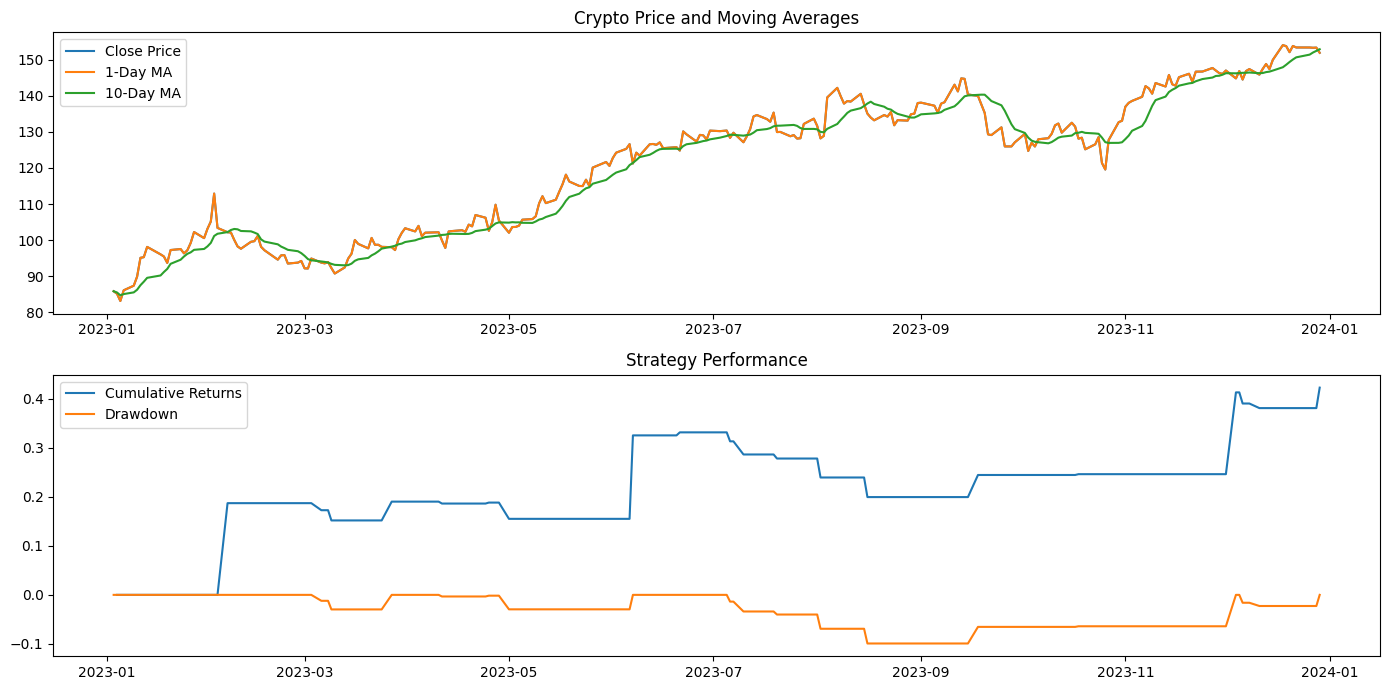

Total Invested amount :  100000
Final Return Percentage: 42.27%
Final Equity: $142266.28
Total Trades: 40
Max Drawdown: 9.92%


In [9]:



import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define parameters
symbol = 'AMZN'  # Crypto symbol
start_date = '2023-01-01'
end_date = '2024-01-01'
short_window = 1
long_window = 10

# Download historical data
data = yf.download(symbol, start=start_date, end=end_date)
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Generate trading signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Backtesting the strategy
initial_capital = 100000
shares = 0
capital = initial_capital
position = 0
equity = []
trade_count = 0  # To count the number of trades

for i in range(len(data)):
    if data['Position'][i] == 1:
        # Buy
        shares = capital / data['Close'][i]
        position = shares * data['Close'][i]
        capital = 0
        trade_count += 1  # Increment trade count on buy
    elif data['Position'][i] == -1:
        # Sell
        capital = shares * data['Close'][i]
        shares = 0
        position = 0
        trade_count += 1  # Increment trade count on sell
    equity.append(capital + position)

data['Equity'] = equity

# Calculate returns and drawdown
data['Returns'] = data['Equity'].pct_change()
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Drawdown'] = data['Equity'] / data['Equity'].cummax() - 1

# Plot results
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['Short_MA'], label='1-Day MA')
plt.plot(data.index, data['Long_MA'], label='10-Day MA')
plt.title('Crypto Price and Moving Averages')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data.index, data['Cumulative_Returns'], label='Cumulative Returns')
plt.plot(data.index, data['Drawdown'], label='Drawdown')
plt.title('Strategy Performance')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
final_return_percentage = data['Cumulative_Returns'].iloc[-1] * 100
final_equity = data['Equity'].iloc[-1]
max_drawdown = data['Drawdown'].min()

print("Total Invested amount : ",initial_capital)
print(f"Final Return Percentage: {final_return_percentage:.2f}%")
print(f"Final Equity: ${final_equity:.2f}")
print(f"Total Trades: {trade_count}")
print(f"Max Drawdown: {-max_drawdown * 100:.2f}%")

